<a href="https://colab.research.google.com/github/sameer203/Tensorflow_/blob/main/05_Computer_vision_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

ROOT = "/content/drive/MyDrive/Tensorflow"

os.chdir(ROOT)
os.getcwd()

'/content/drive/MyDrive/Tensorflow'

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Get the Data

In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downladed file

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-10-22 18:24:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 172.253.114.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  35.1MB/s    in 3.0s    

2021-10-22 18:25:01 (35.1 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



### Inspecting the Data

In [4]:
!ls pizza_steak

test  train


In [5]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 1 images in pizza_steak
There are 2 directories and 1 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 1 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [6]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [7]:
# Get the classnames programatically
import pathlib
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]
class_names

array(['pizza', 'steak'], dtype='<U9')

In [8]:
# Visualize images
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape : {img.shape}")

  return img

['129536.jpg']
image shape : (512, 384, 3)


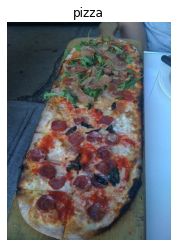

In [9]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

['442757.jpg']
image shape : (512, 512, 3)


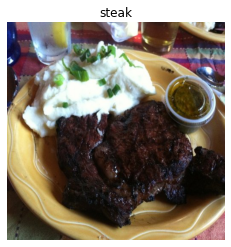

In [10]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

### End to End Example

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# Set random seed
tf.random.set_seed(42)

#Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen = ImageDataGenerator(rescale=1./255.)

#setup data paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#import data from directories and trun into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3,
                                                             activation="relu",
                                                             input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(10,3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding="valid"),
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.Conv2D(10,3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps = len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 45s 310ms/step - loss: 0.5745 - accuracy: 0.7053 - val_loss: 0.3811 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 14s 289ms/step - loss: 0.4193 - accuracy: 0.8100 - val_loss: 0.3666 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 14s 287ms/step - loss: 0.3766 - accuracy: 0.8327 - val_loss: 0.3165 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 14s 290ms/step - loss: 0.3897 - accuracy: 0.8340 - val_loss: 0.3043 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 14s 293ms/step - loss: 0.3292 - accuracy: 0.8620 - val_loss: 0.2986 - val_accuracy: 0.8780


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

### using the simple neuralnet on this dataset

In [14]:
# set random seed
tf.random.set_seed(42)

# Build a model
model_2 = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(input_shape=(224,224, 3)),
                                      tf.keras.layers.Dense(4,activation="relu"),
                                      tf.keras.layers.Dense(4,activation="relu"),
                                      tf.keras.layers.Dense(1,activation="sigmoid"),
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 265ms/step - loss: 1.3610 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 257ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 250ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 12s 258ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 248ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Model_3

# set random seed
tf.random.set_seed(42)

# Build a model
model_3 = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(input_shape=(224,224, 3)),
                                      tf.keras.layers.Dense(100,activation="relu"),
                                      tf.keras.layers.Dense(100,activation="relu"),
                                      tf.keras.layers.Dense(100,activation="relu"),
                                      tf.keras.layers.Dense(1,activation="sigmoid"),
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 260ms/step - loss: 4.9614 - accuracy: 0.6260 - val_loss: 0.7727 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 12s 257ms/step - loss: 0.6875 - accuracy: 0.7207 - val_loss: 0.7519 - val_accuracy: 0.6340
Epoch 3/5
47/47 [==============================] - 12s 257ms/step - loss: 0.5843 - accuracy: 0.7533 - val_loss: 0.6256 - val_accuracy: 0.6620
Epoch 4/5
47/47 [==============================] - 12s 261ms/step - loss: 0.4678 - accuracy: 0.8033 - val_loss: 0.5332 - val_accuracy: 0.7560
Epoch 5/5
47/47 [==============================] - 12s 260ms/step - loss: 0.5121 - accuracy: 0.7773 - val_loss: 0.4452 - val_accuracy: 0.7940


In [17]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Breakdown of Binary Classification

### 1. Data exploration again!

['2440131.jpg']
image shape : (512, 512, 3)
['807128.jpg']
image shape : (512, 512, 3)


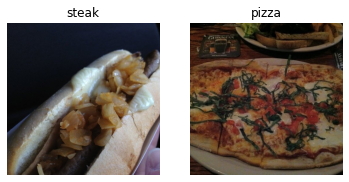

In [18]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the Data

In [19]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [20]:
!nvidia-smi

Fri Oct 22 18:30:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    58W / 149W |   1281MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [21]:
# create train and test data generation and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen = ImageDataGenerator(rescale=1./255.)


In [22]:
# Load images and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
#Get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [24]:
len(train_data)

47

In [25]:
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [26]:
images[7], images[7].shape

(array([[[0.16078432, 0.10980393, 0.13725491],
         [0.16078432, 0.10980393, 0.13725491],
         [0.16862746, 0.11764707, 0.14509805],
         ...,
         [0.10980393, 0.1137255 , 0.12941177],
         [0.11764707, 0.12156864, 0.12941177],
         [0.09019608, 0.10588236, 0.10980393]],
 
        [[0.1764706 , 0.1254902 , 0.15294118],
         [0.17254902, 0.12156864, 0.14901961],
         [0.1764706 , 0.13333334, 0.15686275],
         ...,
         [0.12156864, 0.10196079, 0.11764707],
         [0.1137255 , 0.10588236, 0.11764707],
         [0.10588236, 0.10588236, 0.1137255 ]],
 
        [[0.17254902, 0.12156864, 0.14901961],
         [0.16078432, 0.11764707, 0.14117648],
         [0.16470589, 0.12156864, 0.14509805],
         ...,
         [0.20392159, 0.16078432, 0.1764706 ],
         [0.17254902, 0.13725491, 0.15686275],
         [0.12941177, 0.10196079, 0.12941177]],
 
        ...,
 
        [[0.09019608, 0.09019608, 0.12941177],
         [0.09411766, 0.09411766, 0.13333

In [27]:
#view the first batch of labels
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

### 3. Creating a model

In [28]:
# Baseline model

#making the model little easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [29]:
# Model 4

# set random seed
tf.random.set_seed(42)

# Create the model
model_4 = Sequential([
                      Conv2D(filters=10,
                             kernel_size=3,
                             strides=1,
                             padding="valid",
                             activation="relu",
                             input_shape=(224,224, 3)),
                      Conv2D(10, 3,activation="relu"),
                      Conv2D(10,3, activation="relu"),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

# Compile the Model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the Model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 301ms/step - loss: 0.9032 - accuracy: 0.6260 - val_loss: 0.5067 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 13s 287ms/step - loss: 0.4699 - accuracy: 0.7807 - val_loss: 0.3566 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 13s 283ms/step - loss: 0.3833 - accuracy: 0.8347 - val_loss: 0.4970 - val_accuracy: 0.7620
Epoch 4/5
47/47 [==============================] - 13s 283ms/step - loss: 0.3630 - accuracy: 0.8567 - val_loss: 0.3989 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 13s 283ms/step - loss: 0.2608 - accuracy: 0.9113 - val_loss: 0.3703 - val_accuracy: 0.8520


### Evaluating the metrics

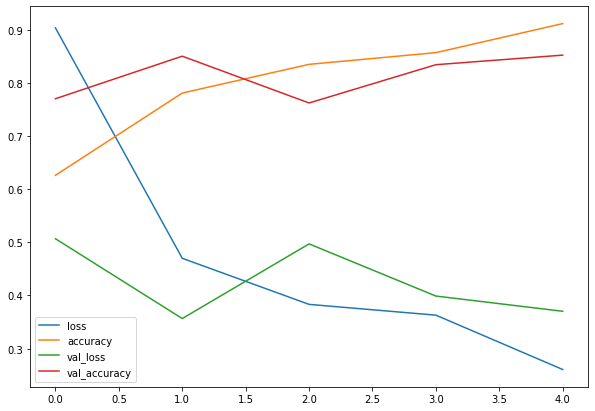

In [30]:
# Evaluate the metrics
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [31]:
# Plot the training and Validation curves seperatley

def plot_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs= range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

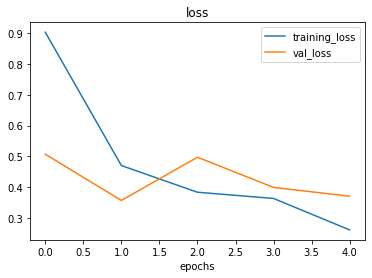

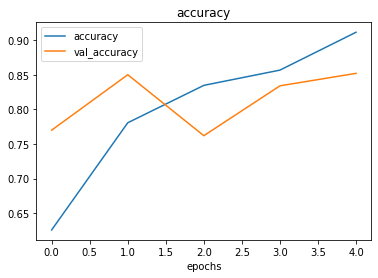

In [32]:
plot_curves(history=history_4)

### Regularizing the Model - MaxPool

In [33]:
# Model 5

# set random seed
tf.random.set_seed(42)

# Create the model
model_5 = Sequential([
                      Conv2D(filters=10,
                             kernel_size=3,
                             strides=1,
                             padding="valid",
                             activation="relu",
                             input_shape=(224,224, 3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3,activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

# Compile the Model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the Model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 266ms/step - loss: 0.5768 - accuracy: 0.7067 - val_loss: 0.4573 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 12s 264ms/step - loss: 0.4797 - accuracy: 0.7773 - val_loss: 0.4030 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 12s 257ms/step - loss: 0.4154 - accuracy: 0.8053 - val_loss: 0.3373 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 12s 258ms/step - loss: 0.3835 - accuracy: 0.8300 - val_loss: 0.3027 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 12s 261ms/step - loss: 0.4117 - accuracy: 0.8227 - val_loss: 0.3170 - val_accuracy: 0.8680


In [34]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

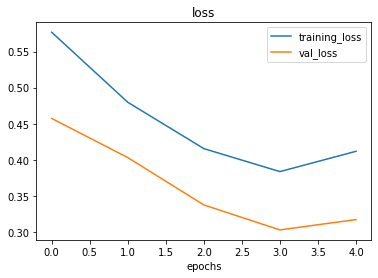

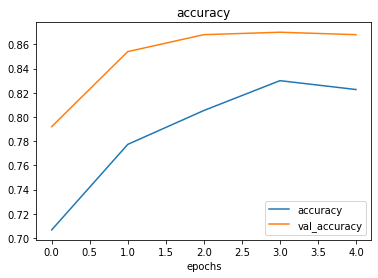

In [35]:
plot_curves(history_5)

### Data agumentation

In [36]:
#create ImageDataGenerator training instance with data agumentation
train_datagen_agumented = ImageDataGenerator(rescale=1./255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data agumentation
train_datagen = ImageDataGenerator(rescale=1./255.)

test_datagen = ImageDataGenerator(rescale=1./255.)


In [37]:
# Import data and agument it from training directory
train_data_agumented = train_datagen_agumented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)
# create non agumented data
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)

test_data = test_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [38]:
# get sample agumented data
images, labels =  train_data.next()

agumented_images, agumented_labels = train_data_agumented.next()

(-0.5, 223.5, 223.5, -0.5)

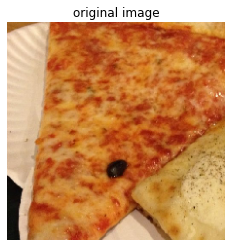

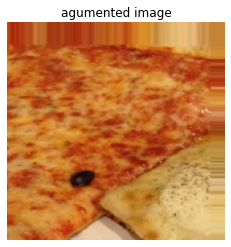

In [39]:
# Show original and agumented image
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title("original image")
plt.axis(False)

plt.figure()
plt.imshow(agumented_images[random_number])
plt.title("agumented image")
plt.axis(False)

In [40]:
# Model 6 - Fitting the model with agumented data

# set random seed
tf.random.set_seed(42)

# Create the model
model_6 = Sequential([
                      Conv2D(filters=10,
                             kernel_size=3,
                             strides=1,
                             padding="valid",
                             activation="relu",
                             input_shape=(224,224, 3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3,activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

# Compile the Model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the Model
history_6 = model_6.fit(train_data_agumented,
                        epochs=5,
                        steps_per_epoch=len(train_data_agumented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 34s 708ms/step - loss: 0.7005 - accuracy: 0.5280 - val_loss: 0.6790 - val_accuracy: 0.6067
Epoch 2/5
47/47 [==============================] - 33s 699ms/step - loss: 0.6967 - accuracy: 0.5067 - val_loss: 0.6621 - val_accuracy: 0.7113
Epoch 3/5
47/47 [==============================] - 32s 688ms/step - loss: 0.6900 - accuracy: 0.5307 - val_loss: 0.6617 - val_accuracy: 0.7487
Epoch 4/5
47/47 [==============================] - 32s 683ms/step - loss: 0.6946 - accuracy: 0.5473 - val_loss: 0.6571 - val_accuracy: 0.7227
Epoch 5/5
47/47 [==============================] - 32s 690ms/step - loss: 0.6613 - accuracy: 0.6360 - val_loss: 0.5956 - val_accuracy: 0.7493


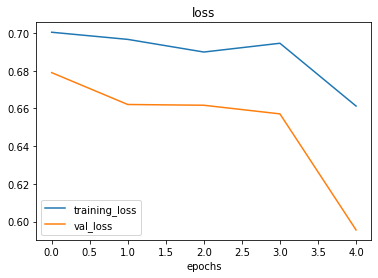

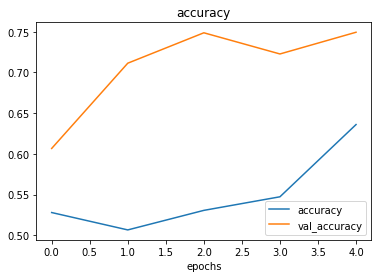

In [41]:
plot_curves(history_6)

### Shuffling the agumented data

In [42]:
# Import data and agument it from training directory and shuffled
train_data_agumented_shuffled = train_datagen_agumented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)
# create non agumented data
train_data_shuffled = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=True)

test_data_shuffled = test_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=True)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [43]:
#get sample agumented data
images, labels =  train_data.next()

agumented_images, agumented_labels = train_data_agumented.next()

(-0.5, 223.5, 223.5, -0.5)

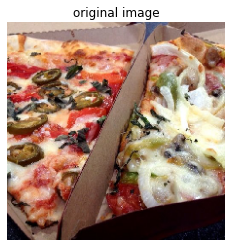

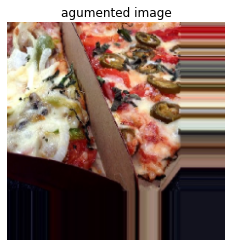

In [44]:
# Show original and agumented image
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title("original image")
plt.axis(False)

plt.figure()
plt.imshow(agumented_images[random_number])
plt.title("agumented image")
plt.axis(False)

In [45]:
# Model 6 - Fitting the model with agumented data and shuffled

# set random seed
tf.random.set_seed(42)

# Create the model
model_7 = Sequential([
                      Conv2D(filters=10,
                             kernel_size=3,
                             strides=1,
                             padding="valid",
                             activation="relu",
                             input_shape=(224,224, 3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3,activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

# Compile the Model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the Model
history_7 = model_7.fit(train_data_agumented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_agumented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 34s 710ms/step - loss: 0.6388 - accuracy: 0.6333 - val_loss: 0.5300 - val_accuracy: 0.7387
Epoch 2/5
47/47 [==============================] - 33s 711ms/step - loss: 0.5640 - accuracy: 0.7113 - val_loss: 0.4552 - val_accuracy: 0.7873
Epoch 3/5
47/47 [==============================] - 33s 709ms/step - loss: 0.5225 - accuracy: 0.7360 - val_loss: 0.4041 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 32s 694ms/step - loss: 0.4886 - accuracy: 0.7720 - val_loss: 0.4111 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 32s 691ms/step - loss: 0.4618 - accuracy: 0.7840 - val_loss: 0.3942 - val_accuracy: 0.8287


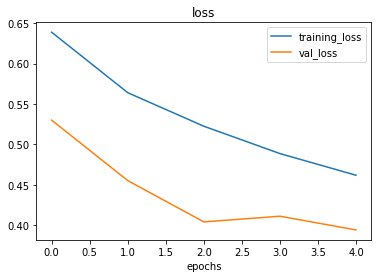

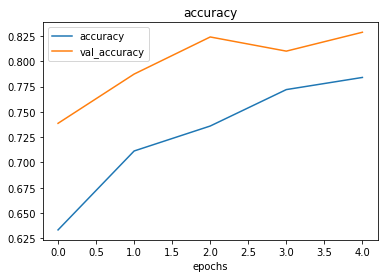

In [46]:
plot_curves(history_7)